In [83]:
#!pip install matplotlib
#!pip install tensorflow
#!pip install sklearn
#!pip install opencv-python
#!pip install numpy
#!pip install imutils
#!pip install scikit-image
!pip install keras

  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp38-cp38-linux_x86_64.whl size=44619 sha256=117eac3bf3ec1ff71b5f9b91586e1f15414949b1cca12cefe7b9bca28c3dcc6a
  Stored in directory: /home/akash/.cache/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c
Successfully built pyyaml


In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
dataset = r"Data"

In [70]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [5]:
args={}
args["dataset"]=dataset

In [24]:
import numpy as np
import cv2
import os

iPaths=list(paths.list_images(args["dataset"]))

data=[]
labels=[]

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data = np.array(data)/255.0
labels = np.array(labels)

In [25]:
#image[8], image.shape, iPaths
data

array([[[[0.17254902, 0.17254902, 0.17254902],
         [0.14509804, 0.14509804, 0.14509804],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.14509804, 0.14509804, 0.14509804],
         [0.1372549 , 0.1372549 , 0.1372549 ],
         [0.12941176, 0.12941176, 0.12941176]],

        [[0.14509804, 0.14509804, 0.14509804],
         [0.15294118, 0.15294118, 0.15294118],
         [0.18039216, 0.18039216, 0.18039216],
         ...,
         [0.18431373, 0.18431373, 0.18431373],
         [0.17254902, 0.17254902, 0.17254902],
         [0.16862745, 0.16862745, 0.16862745]],

        [[0.1372549 , 0.1372549 , 0.1372549 ],
         [0.14901961, 0.14901961, 0.14901961],
         [0.16862745, 0.16862745, 0.16862745],
         ...,
         [0.2       , 0.2       , 0.2       ],
         [0.18823529, 0.18823529, 0.18823529],
         [0.2       , 0.2       , 0.2       ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [26]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

Normal Chest X-ray Vs Covid-19 Chest X-ray


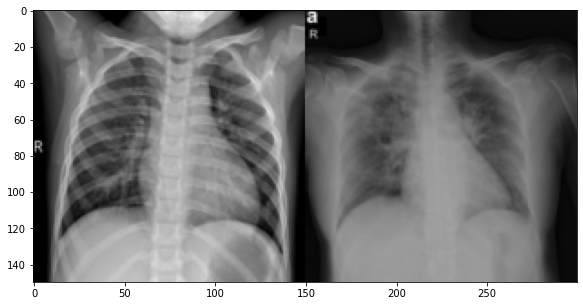

Normal Chest X-ray Vs Covid-19 Chest X-ray


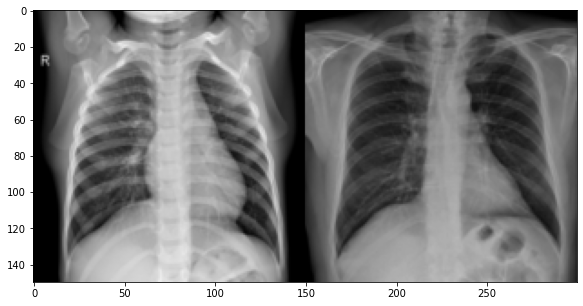

Normal Chest X-ray Vs Covid-19 Chest X-ray


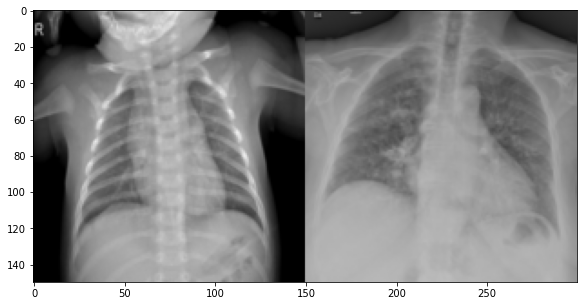

Normal Chest X-ray Vs Covid-19 Chest X-ray


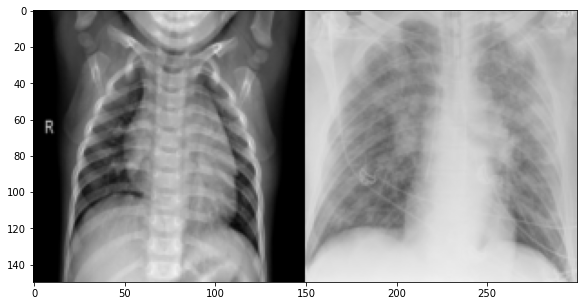

Normal Chest X-ray Vs Covid-19 Chest X-ray


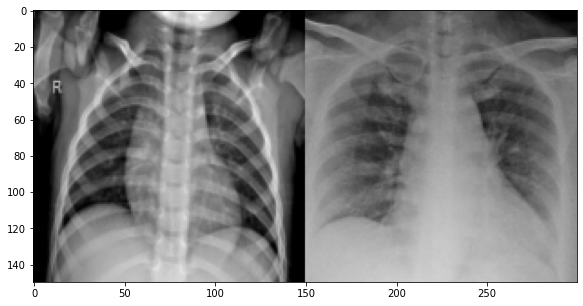

In [40]:
Cimages = os.listdir(dataset+"/Covid")
Nimages = os.listdir(dataset+"/Normal")

import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(dataset+"/Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"/Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [41]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [43]:
(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.20,random_state=42, stratify=labels)

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

In [46]:
trainAug = ImageDataGenerator(rotation_range=15, fill_mode='nearest')
trainAug

In [54]:
bModel = VGG16(weights = 'imagenet', include_top = False, input_tensor=Input(shape=(224,224,3)))
bModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
hModel=bModel.output
hModel=AveragePooling2D(pool_size=(4,4))(hModel)
hModel=Flatten(name='flatten')(hModel)
hModel=Dense(64,activation='relu')(hModel)
hModel=Dropout(0.5)(hModel)
hModel=Dense(2,activation='softmax')(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [59]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

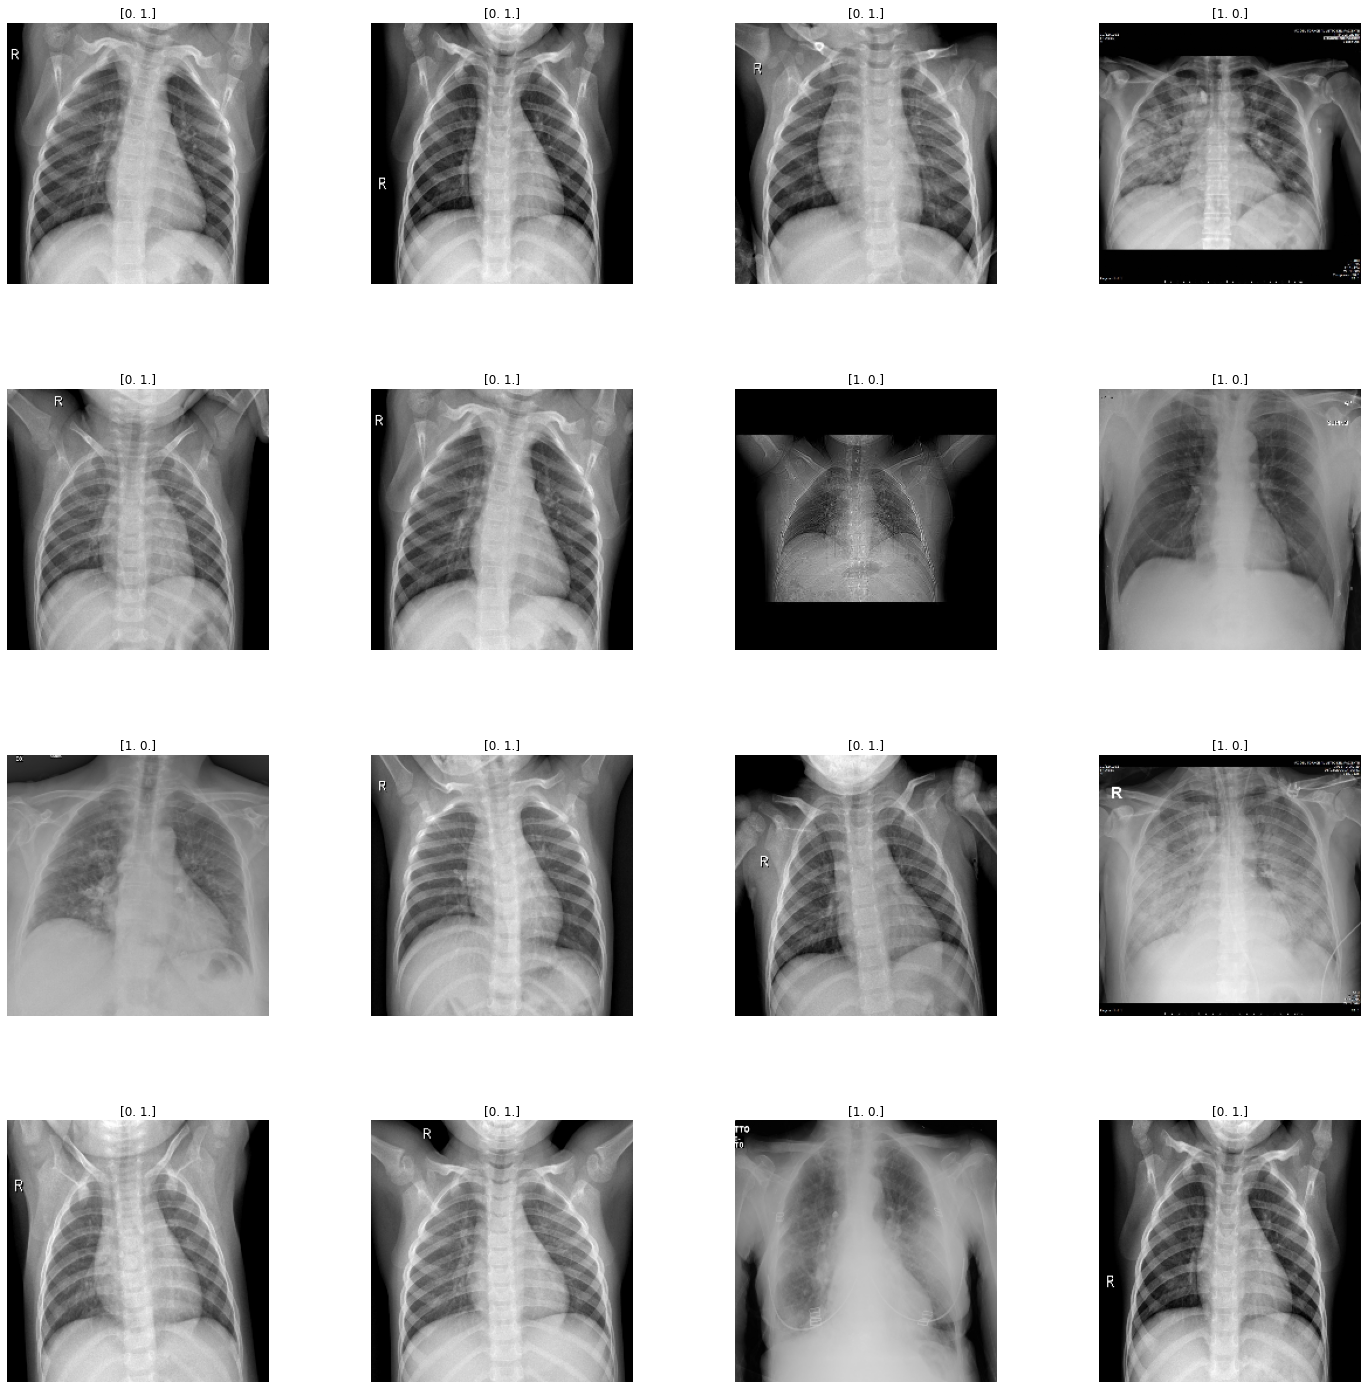

In [64]:
W_grid = 4 
L_grid = 4 
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [68]:
opt = Adam(lr=INIT_LR, decay= INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['Accuracy'])

In [71]:
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 0.5192 - accuracy: 0.0000e+00 - val_loss: 0.4283 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 55s 3s/step - loss: 0.4056 - accuracy: 0.0000e+00 - val_loss: 0.3706 - val_accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 47s 2s/step - loss: 0.3590 - accuracy: 0.0000e+00 - val_loss: 0.2974 - val_accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 47s 2s/step - loss: 0.2607 - accuracy: 0.0000e+00 - val_loss: 0.2410 - val_accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 47s 2s/step - loss: 0.2582 - accuracy: 0.0000e+00 - val_loss: 0.2093 - val_accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 48s 2s/step - loss: 0.2060 - accuracy: 0.0000e+00 - val_loss: 0.1808 - val_accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 50s 3s/step - loss: 0.1847 - accuracy: 0.0000e+00 - val_loss

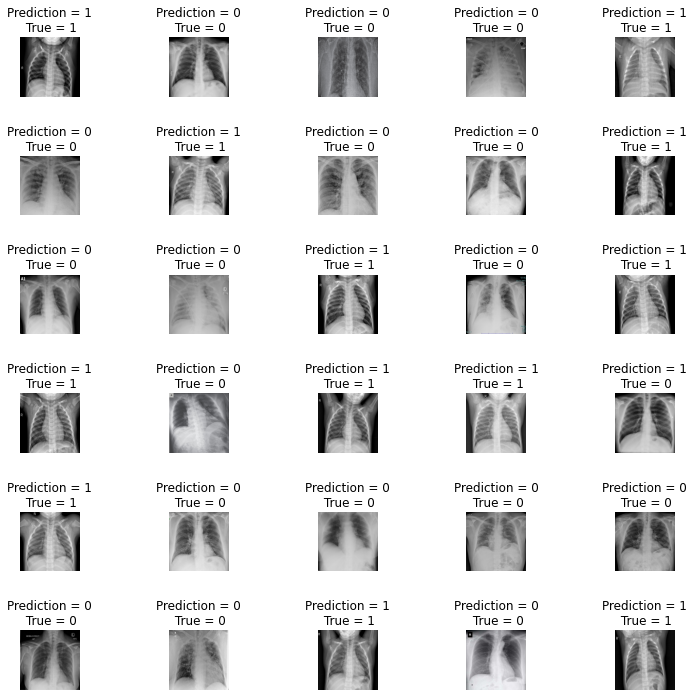

In [72]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [74]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=BS)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1),y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       1.00      0.95      0.97        20
      Normal       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [75]:
lb.classes_

array(['Covid', 'Normal'], dtype='<U6')

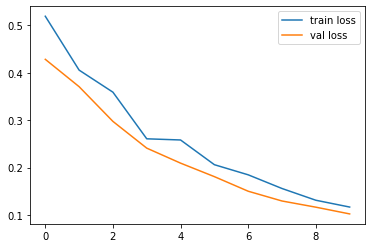

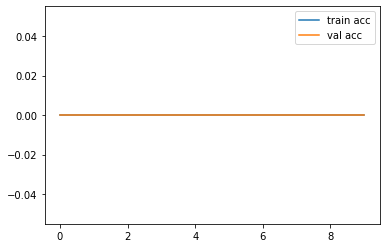

In [76]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.975

In [77]:
model.save("model.h5")

Prediction: Corona


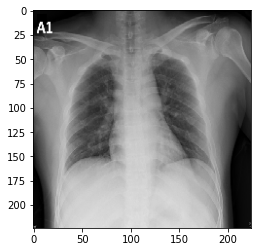

In [84]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224)) 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


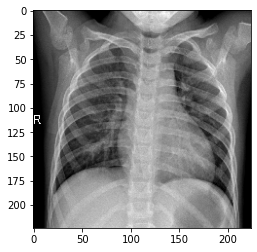

In [85]:
img = image.load_img('Data/Normal/IM-0162-0001.jpeg', target_size=(224, 224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')